In [1]:

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from tqdm import tqdm

from simulation import spike_simulation, recurrent_interactions_input, bins_spike, get_orientation, get_theta_time_series
import constant as ct


# 1.1

100%|██████████| 9999/9999 [00:00<00:00, 17782.84it/s]


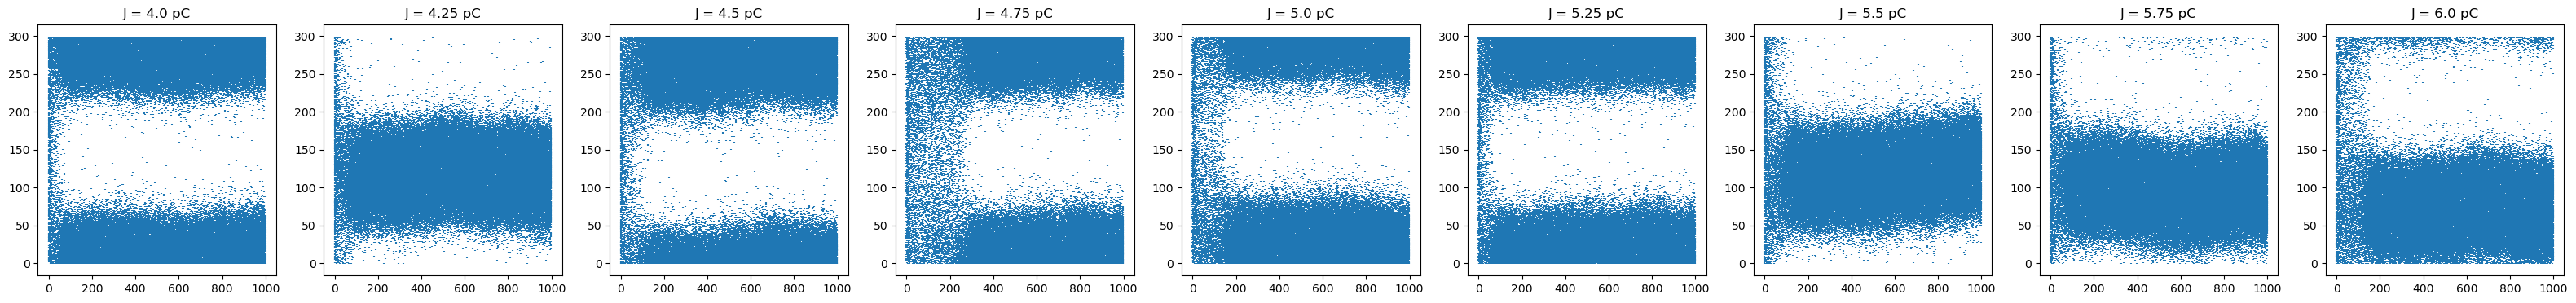

In [2]:
J_values = np.linspace(4, 6, 9)

fig, ax = plt.subplots(1, len(J_values), figsize=(40, 4))

for i, J in enumerate(J_values):
    h,s = spike_simulation(input_fct=recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N), J = ct.J)
    
    s = bins_spike(s, 1)
    spike_times = [np.where(s.T[i] !=0)[0] for i in range(ct.N)]
    ax[i].eventplot(spike_times, orientation='horizontal')
    ax[i].set_title(f'J = {J} pC')
plt.show()
    

# 1.2

In [3]:
print(get_orientation(np.array([0, 1,5,10]), 11))
print(get_orientation(np.array([0,1,499,500,999]), 1000))

[ 16.36363636  49.09090909 180.         343.63636364]
[1.8000e-01 5.4000e-01 1.7982e+02 1.8018e+02 3.5982e+02]


In [4]:
h,s = spike_simulation(input_fct=recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N), J=ct.J)
s = bins_spike(s, 10)
theta = get_theta_time_series(spikes=s)

100%|██████████| 9999/9999 [00:00<00:00, 16579.29it/s]


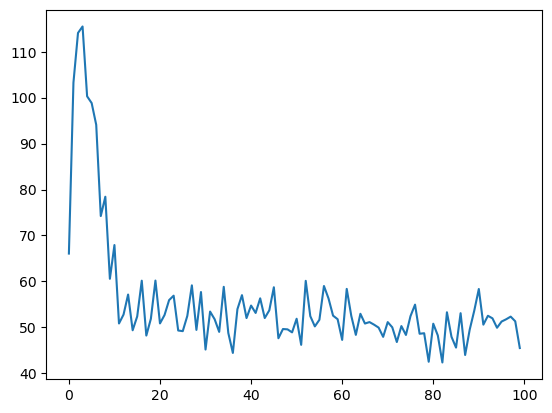

In [5]:
plt.plot(theta)

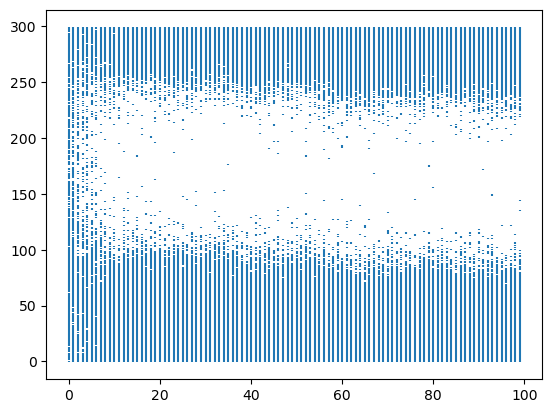

In [6]:
fig = plt.figure()
spike_times = [np.where(s.T[i] !=0)[0] for i in range(ct.N)]
plt.eventplot(spike_times, orientation='horizontal')

# 1.3